In [ ]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz #나무구조 생성 및 저장
import graphviz #나무구조 시각화
from sklearn.preprocessing import StandardScaler
#회귀모델
import statsmodels.formula.api as smf
import statsmodels.api as sm
#선형회귀 모델
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor #예측/회귀: decision tree

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split #데이터 분할

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!sudo apt-get install -y fonts-nanum 
!sudo fc-cache -fv 
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
matplotlib.rc('font', family = 'NanumBarunGothic')
matplotlib.rc('axes', unicode_minus = False)
plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

#### 산업별 미세먼지 영향인자 배출량 분석

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_raw_ind= pd.read_excel("/content/drive/MyDrive/Big Data 분석 기초/2019년_부문별 배출량.xlsx", sheet_name = 'Sheet1')
df_raw_ind.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,배출원 대분류,TSP,PM-2.5,PM-10,SOx,NOx,VOCs,NH3,CO,BC
0,에너지산업 연소,3645.0,2813.0,3365.0,45297.0,75513.0,8434.0,1422.0,64327.0,372.0
1,비산업 연소,1311.0,857.0,1177.0,15869.0,85814.0,2828.0,1350.0,47629.0,180.0
2,제조업 연소,90718.0,27118.0,52932.0,65730.0,169221.0,3404.0,717.0,19737.0,623.0
3,생산공정,11821.0,5139.0,6699.0,105699.0,51705.0,186292.0,44630.0,26766.0,15.0
4,에너지수송 및 저장,NaN,NaN,NaN,NaN,NaN,29062.0,NaN,NaN,NaN


In [ ]:
df_raw_ind.isnull().sum()

배출원 대분류    0
TSP        3
PM-2.5     3
PM-10      3
SOx        5
NOx        4
VOCs       2
NH3        3
CO         4
BC         3
dtype: int64

In [ ]:
df_raw_ind.fillna(0, inplace =True) #excel 원본 데이터 확인시 데이터가 없는 column에 대하여 결측치로 처리되어 있어 0으로 채움

In [ ]:
df_raw_ind.isnull().sum()

배출원 대분류    0
TSP        0
PM-2.5     0
PM-10      0
SOx        0
NOx        0
VOCs       0
NH3        0
CO         0
BC         0
dtype: int64

In [ ]:
df_raw_ind.describe()

,TSP,PM-2.5,PM-10,SOx,NOx,VOCs,NH3,CO,BC
count,14.000000,14.000000,14.000000,14.000000,1.400000e+01,1.400000e+01,14.000000,14.000000,14.000000
mean,69218.142857,12516.928571,29695.142857,38979.857143,1.552660e+05,1.457452e+05,45185.571429,108263.928571,2030.142857
std,147242.870850,23168.768157,59023.767628,74623.293879,2.940201e+05,2.898732e+05,102791.720430,202565.868717,4034.152754
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,511.500000,305.750000,350.000000,0.000000,6.775000e+01,2.972000e+03,16.750000,535.000000,6.000000
50%,5182.000000,3976.000000,5032.000000,1317.000000,3.201850e+04,3.286250e+04,1033.500000,23251.500000,151.000000
75%,25519.250000,14862.250000,16400.250000,43361.500000,1.483692e+05,7.862850e+04,10375.250000,151448.500000,1769.000000
max,484527.000000,87618.000000,207866.000000,272859.000000,1.086862e+06,1.020216e+06,316299.000000,757848.000000,14211.000000


In [ ]:
df_raw_ind

,배출원 대분류,TSP,PM-2.5,PM-10,SOx,NOx,VOCs,NH3,CO,BC
0,에너지산업 연소,3645.0,2813.0,3365.0,45297.0,75513.0,8434.0,1422.0,64327.0,372.0
1,비산업 연소,1311.0,857.0,1177.0,15869.0,85814.0,2828.0,1350.0,47629.0,180.0
2,제조업 연소,90718.0,27118.0,52932.0,65730.0,169221.0,3404.0,717.0,19737.0,623.0
3,생산공정,11821.0,5139.0,6699.0,105699.0,51705.0,186292.0,44630.0,26766.0,15.0
4,에너지수송 및 저장,0.0,0.0,0.0,0.0,0.0,29062.0,0.0,0.0,0.0
5,유기용제 사용,0.0,0.0,0.0,0.0,0.0,545244.0,0.0,0.0,0.0
6,도로이동오염원,6719.0,6182.0,6719.0,308.0,371851.0,36663.0,2615.0,180489.0,3801.0
7,비도로이동오염원,17270.0,15989.0,17265.0,37555.0,311748.0,63951.0,122.0,187565.0,6904.0
8,폐기물처리,367.0,228.0,267.0,2326.0,12332.0,59537.0,22.0,2140.0,3.0
9,농업,0.0,0.0,0.0,0.0,0.0,0.0,252444.0,0.0,0.0


In [ ]:
df_raw_a = df_raw_ind.loc[:, ['배출원 대분류', 'PM-10']]
df_raw_a = df_raw_a.drop([4,5,8,9,10,13])
df_raw_a 
#수치가 낮은 배출원 제외 후 pie-chart로 확인

,배출원 대분류,PM-10
0,에너지산업 연소,3365.0
1,비산업 연소,1177.0
2,제조업 연소,52932.0
3,생산공정,6699.0
6,도로이동오염원,6719.0
7,비도로이동오염원,17265.0
11,비산먼지,105037.0
12,생물성 연소,13806.0


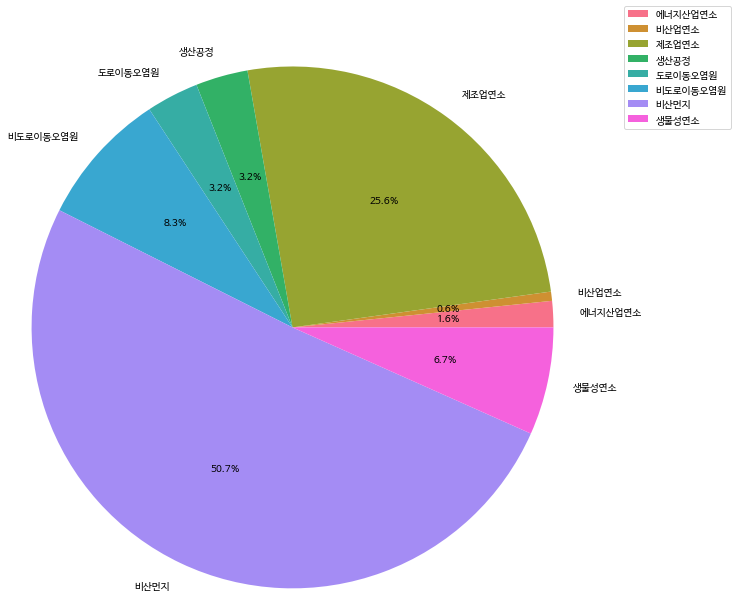

In [ ]:
labels = ['에너지산업연소','비산업연소','제조업연소','생산공정','도로이동오염원','비도로이동오염원','비산먼지','생물성연소']
frequency = [3365,1177,52932,6699,6719,17265,105037,13806]
fig = plt.figure(figsize=(4,4)) 

colors = sns.color_palette("husl", 8)
fig.set_facecolor('white') 
 
ax = fig.add_subplot() 
 
pie = ax.pie(x=frequency,labels=labels, radius = 3, colors= colors, autopct='%.1f%%') ## 파이 차트 출력
plt.legend(bbox_to_anchor=(2,2))

plt.show()

##### PM10의 주요 배출원의 배출비율은 비산먼지, 제조업연소, 비도로이동오염원 순으로 높다

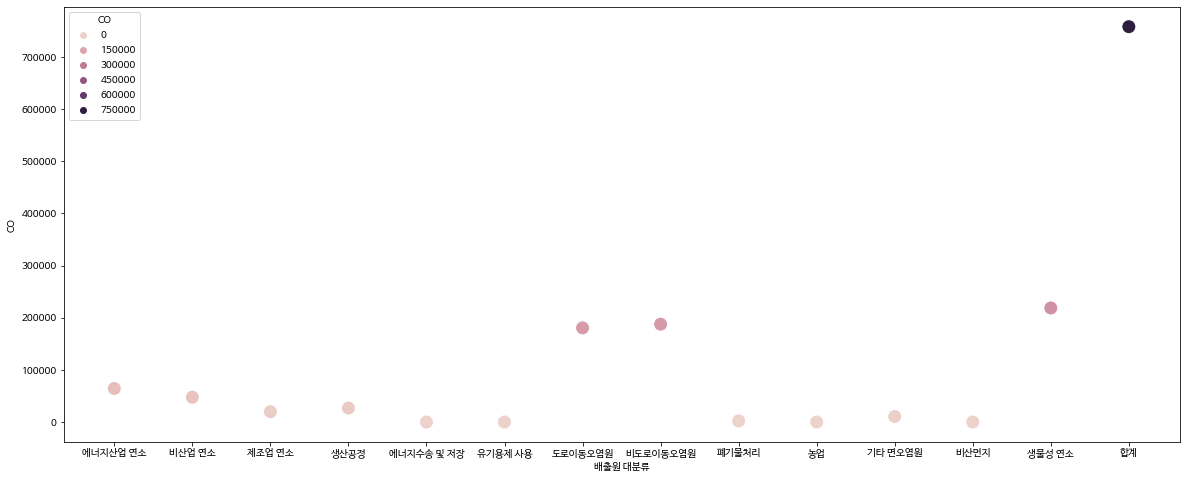

In [ ]:
fig = plt.figure(figsize=(20,8))

sns.scatterplot(x = '배출원 대분류', y = 'CO', hue = 'CO', s =200, data = df_raw_ind)
#CO의 경우 생물성 연소 > 비도로이동오염원 > 도로이동오염원 순으로 높다

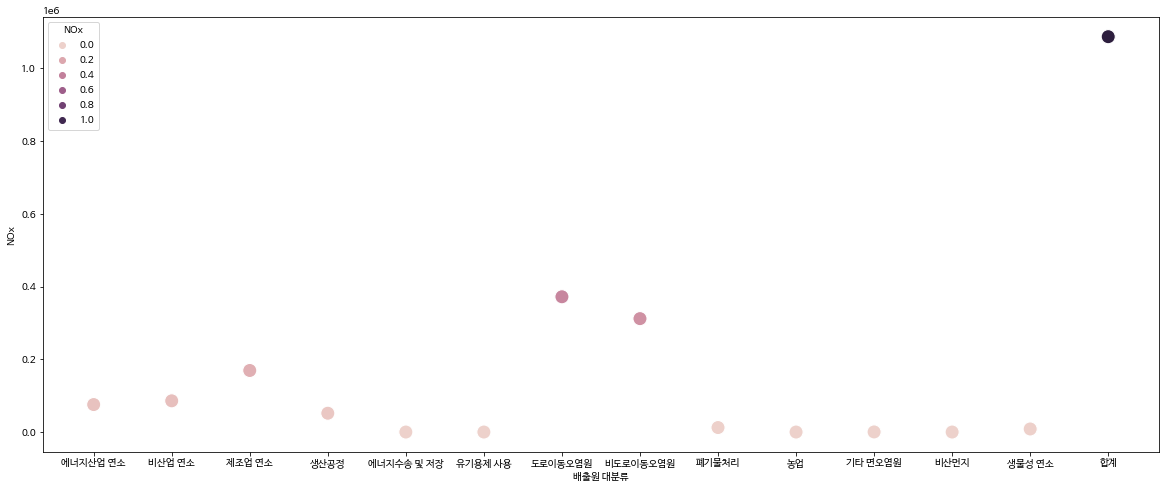

In [ ]:
fig = plt.figure(figsize=(20,8))

sns.scatterplot(x = '배출원 대분류', y = 'NOx', hue = 'NOx', s =200, data = df_raw_ind) 
#NOx(질소산화물)의 경우 도로이동오염원>비도로이동오염원>제조업연소 순으로 높다

### 미세먼지 데이터 분석

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_raw = pd.read_csv("/content/drive/MyDrive/Big Data 분석 기초/AIR_POLLUTION.csv", parse_dates= ['MeasDate'])
df_raw.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92


### 데이터 특성 (기초통계/이상치/결측치) 확인

In [ ]:
df_raw.shape

(366, 14)

In [ ]:
df_raw.info() #데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   366 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         311 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       366 non-null    float64       
 7   RAIN       366 non-null    float64       
 8   WIND       366 non-null    float64       
 9   WIND_DIR   366 non-null    int64         
 10  HUMIDITY   366 non-null    float64       
 11  ATM_PRESS  366 non-null    float64       
 12  SNOW       366 non-null    float64       
 13  CLOUD      366 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 40.2 KB


In [ ]:
df_raw.describe() #데이터 기초통계확인

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000000,365.000000,365.000000,311.000000,365.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,33.421918,0.023600,0.026814,0.517042,0.003033,13.863798,0.381639,2.225301,209.450820,60.295082,1005.848907,0.022951,5.064016
std,15.937983,0.011896,0.010271,0.152820,0.000632,9.830280,1.122127,0.723171,70.735018,14.534983,8.126823,0.222361,2.986119
min,5.000000,0.002000,0.008000,0.300000,0.002000,-7.950000,0.000000,0.940000,50.000000,17.900000,983.800000,0.000000,0.000000
25%,22.000000,0.014000,0.019000,0.400000,0.003000,5.492500,0.000000,1.722500,160.250000,49.650000,999.400000,0.000000,2.510000
50%,31.000000,0.023000,0.025000,0.500000,0.003000,14.000000,0.000000,2.095000,221.000000,61.050000,1006.450000,0.000000,5.310000
75%,42.000000,0.032000,0.034000,0.600000,0.003000,23.070000,0.115000,2.620000,266.000000,69.950000,1011.575000,0.000000,7.570000
max,101.000000,0.062000,0.059000,1.000000,0.005000,31.720000,11.800000,5.880000,351.000000,95.000000,1025.500000,3.200000,10.000000


In [ ]:
df_raw.isnull().sum() 
#데이터 결측치 확인
#목표변수인 PM10, 설명변수에 (03,NO2,CO,SO2) 결측치가 있는 것으로 확인됨
#결측치 처리를 위하여 해당 변수 간 관계 및 특성 파악이 필요함
#모든 변수가 연속형 변수이므로 평균값/중앙값 등에 의한 대체 고려

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

### 데이터 전처리 (결측치/이상치 등)

In [ ]:
# 1) PM10의 경우 목표변수가 결측치인 경우로 대체가 어려워 제외함
df_raw = df_raw.dropna(subset = ['PM10'])
df_raw.shape

(365, 14)

In [ ]:
df_raw.info() #결측치 제거 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   365 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         311 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       365 non-null    float64       
 7   RAIN       365 non-null    float64       
 8   WIND       365 non-null    float64       
 9   WIND_DIR   365 non-null    int64         
 10  HUMIDITY   365 non-null    float64       
 11  ATM_PRESS  365 non-null    float64       
 12  SNOW       365 non-null    float64       
 13  CLOUD      365 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 42.8 KB


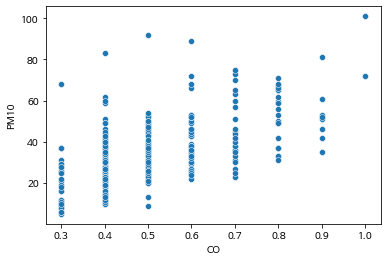

In [ ]:
#2) PM10 (목표변수) - CO (설명변수), 2 연속형 변수 간 분포 확인을 위해 Scatter Plot 작성
# CO 농도가 높을 수록 PM10 농도 역시 높은 것을 확인할 수 있다 (양의 상관관계)
# 따라서 해당변수는 (CO) 목표변수와 주요한 관계에 있을 것으로 예상되므로 결측치 제외가 아닌 대체가 필요함
sns.scatterplot(x='CO', y='PM10', data = df_raw)

In [ ]:
df_raw[df_raw['CO'].isnull()]
#7/26부터 9/17까지 CO 농도가 결측치임을 확인

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
25,2019-07-26,22.0,0.021,0.027,NaN,0.002,25.06,3.00,1.72,187,94.9,993.9,0.0,9.88
26,2019-07-27,20.0,0.028,0.025,NaN,0.003,28.10,0.10,1.15,151,78.6,995.6,0.0,8.21
27,2019-07-28,16.0,0.018,0.019,NaN,0.002,26.31,1.28,2.00,179,87.1,998.0,0.0,9.88
28,2019-07-29,16.0,0.007,0.017,NaN,0.002,27.42,0.17,2.66,197,75.0,999.3,0.0,8.13
29,2019-07-30,22.0,0.010,0.019,NaN,0.002,28.04,0.17,3.45,203,75.3,997.2,0.0,8.33
30,2019-07-31,20.0,0.016,0.025,NaN,0.002,25.87,3.11,2.30,195,91.3,998.9,0.0,9.58
31,2019-08-01,15.0,0.014,0.020,NaN,0.002,26.41,2.25,1.70,237,85.8,1001.8,0.0,7.42
32,2019-08-02,19.0,0.020,0.020,NaN,0.002,28.38,0.00,1.26,185,74.8,1001.9,0.0,4.04
33,2019-08-03,21.0,0.033,0.029,NaN,0.002,29.40,1.00,1.36,152,70.6,1001.1,0.0,4.29
34,2019-08-04,29.0,0.042,0.030,NaN,0.003,28.46,2.87,1.21,165,73.4,1001.0,0.0,5.50


In [ ]:
df_raw.fillna(df_raw.median(), inplace=True)
print(df_raw.shape)
df_raw.isnull().sum()
#따라서 평균이 아닌 중앙값으로 대체 진행

(365, 14)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


MeasDate     0
PM10         0
O3           0
NO2          0
CO           0
SO2          0
TEMP         0
RAIN         0
WIND         0
WIND_DIR     0
HUMIDITY     0
ATM_PRESS    0
SNOW         0
CLOUD        0
dtype: int64

# **Vital few (영향인자) 찾기**

#### EDA

In [ ]:
df_raw.describe()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,33.421918,0.023600,0.026814,0.514521,0.003033,13.853890,0.378712,2.223589,209.320548,60.232055,1005.866575,0.023014,5.055397
std,15.937983,0.011896,0.010271,0.141159,0.000632,9.841944,1.122268,0.723421,70.788136,14.504766,8.130936,0.222663,2.985655
min,5.000000,0.002000,0.008000,0.300000,0.002000,-7.950000,0.000000,0.940000,50.000000,17.900000,983.800000,0.000000,0.000000
25%,22.000000,0.014000,0.019000,0.400000,0.003000,5.480000,0.000000,1.720000,160.000000,49.600000,999.400000,0.000000,2.500000
50%,31.000000,0.023000,0.025000,0.500000,0.003000,13.870000,0.000000,2.090000,221.000000,61.000000,1006.500000,0.000000,5.290000
75%,42.000000,0.032000,0.034000,0.600000,0.003000,23.100000,0.100000,2.620000,266.000000,69.800000,1011.600000,0.000000,7.540000
max,101.000000,0.062000,0.059000,1.000000,0.005000,31.720000,11.800000,5.880000,351.000000,95.000000,1025.500000,3.200000,10.000000


#### 히스토그램 확인

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc362c8410>,
      dtype=object)

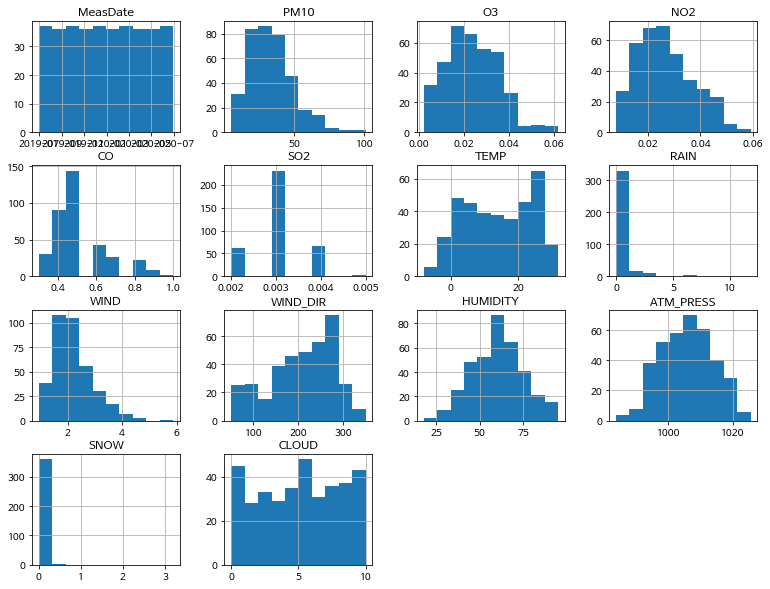

In [ ]:
df_raw.hist(figsize=(13,10))

#### Box plot: 이상치 확인

In [ ]:
df_raw[df_raw['PM10']>70] #PM10 이상치로 의심되는 값 확인

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
120,2019-10-29,83.0,0.021,0.023,0.4,0.003,13.05,0.25,2.40,286,62.1,1004.9,0.0,2.21
122,2019-10-31,72.0,0.022,0.041,0.6,0.004,14.23,0.00,2.21,138,72.8,1010.3,0.0,4.38
123,2019-11-01,89.0,0.027,0.037,0.6,0.003,15.30,0.00,1.80,256,60.0,1011.1,0.0,2.42
162,2019-12-10,101.0,0.010,0.055,1.0,0.004,8.12,0.85,1.22,148,80.6,1008.7,0.0,8.83
163,2019-12-11,73.0,0.021,0.032,0.7,0.004,6.95,0.10,3.26,230,64.5,1006.6,0.0,5.58
176,2019-12-24,72.0,0.006,0.045,1.0,0.003,0.87,0.00,1.26,105,68.4,1016.5,0.0,0.42
207,2020-01-24,71.0,0.018,0.029,0.8,0.004,2.98,0.00,1.81,241,62.7,1019.2,0.0,3.88
227,2020-02-13,75.0,0.015,0.032,0.7,0.003,6.71,0.00,1.68,236,85.4,1008.2,0.0,8.79
228,2020-02-14,81.0,0.011,0.043,0.9,0.003,7.99,0.00,1.20,210,70.8,1010.2,0.0,3.42
315,2020-05-11,92.0,0.034,0.018,0.5,0.002,16.65,0.03,2.96,276,60.8,998.0,0.0,7.50


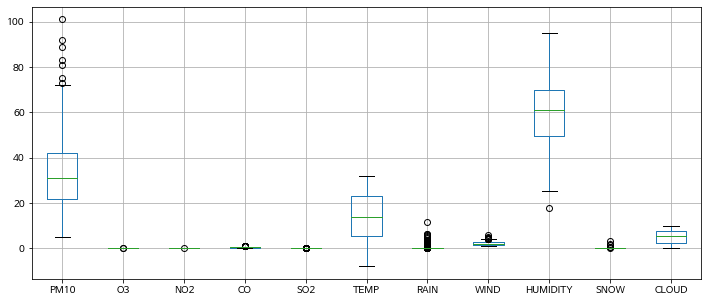

In [ ]:
# boxplot: 상자수염도, figsize: 그래프 크기(x축, y축)
# df_raw, boxplot()
df_raw_box = df_raw.drop(['MeasDate','ATM_PRESS','WIND_DIR'],axis = 1, inplace= False)
df_raw_box.boxplot(figsize = (12,5)) 
#PM10에 (목표변수) 사분위 범위를 넘어서는 값이 있지만 제거 X

#### 산점도 확인

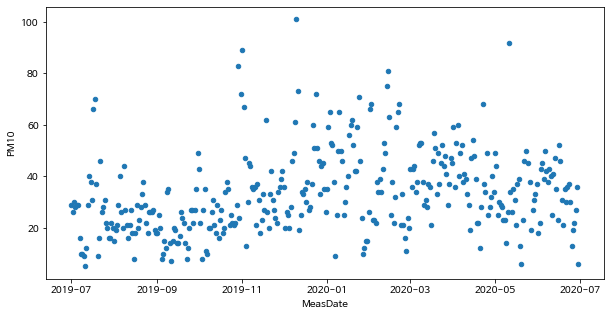

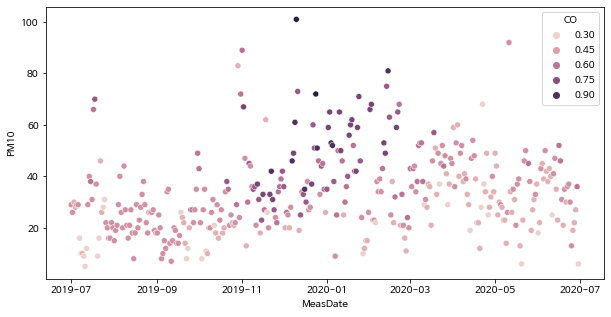

In [ ]:
#산점도
df_raw.plot.scatter(x='MeasDate',y='PM10',figsize=(10,5))
#Seaborn 사용
fig = plt.figure(figsize=(10,5))

sns.scatterplot(x = 'MeasDate', y = 'PM10', hue = 'CO', data = df_raw)
# 시간 흐름에 따른 PM10 농도차이는 뚜렷하게 보이지는 않지만, 11월부터 3월까지 고농도의 PM10 데이터가 존재하는 것을 알 수 있다.
# 그러나 대체로 CO 농도가 높을 때 PM10이 높은 것을 알 수 있다.

In [ ]:
# sns.pairplot(df_raw)

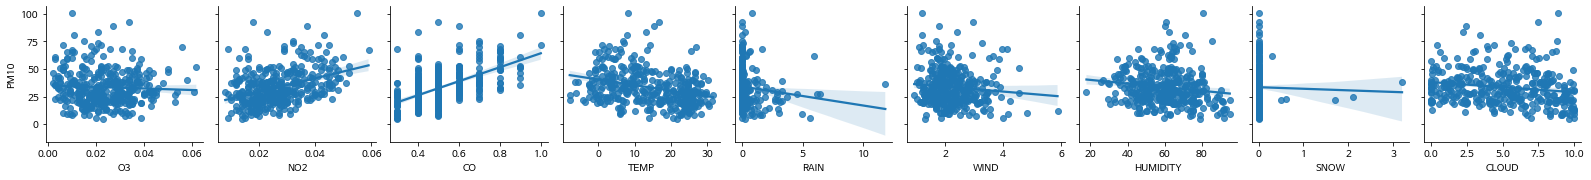

In [ ]:
sns.pairplot(df_raw, y_vars = ['PM10'], x_vars = ['O3', 'NO2', 'CO', 'TEMP', 'RAIN', 'WIND', 'HUMIDITY', 'SNOW', 'CLOUD'], kind ='reg') 
#산점도 확인 결과 NO2,CO (양의 상관관계), TEMP (음의 상관관계) 확인 가능 

#### 상관분석 진행

In [ ]:
df_corr = df_raw.corr()
df_corr
#상관분석 결과 PM10과 CO, NO2, SO2, TEMP가 선형관계 확인됨

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
PM10,1.000000,-0.051763,0.395969,0.560569,0.428685,-0.309786,-0.121444,-0.100323,0.019949,-0.149803,0.253023,-0.020007,-0.172230
O3,-0.051763,1.000000,-0.591658,-0.513349,-0.234127,0.516257,-0.103903,0.165216,0.268680,-0.037699,-0.534372,0.003900,-0.119307
NO2,0.395969,-0.591658,1.000000,0.791103,0.563432,-0.237406,0.029298,-0.536649,-0.408342,-0.065514,0.420292,-0.120893,0.016722
CO,0.560569,-0.513349,0.791103,1.000000,0.566991,-0.361980,0.029842,-0.403193,-0.318731,0.043742,0.400655,-0.054364,0.026279
SO2,0.428685,-0.234127,0.563432,0.566991,1.000000,-0.273629,-0.128750,-0.252864,-0.093200,-0.302278,0.333995,-0.102927,-0.191234
TEMP,-0.309786,0.516257,-0.237406,-0.361980,-0.273629,1.000000,0.077361,-0.216042,-0.050394,0.404147,-0.792079,-0.184503,0.341553
RAIN,-0.121444,-0.103903,0.029298,0.029842,-0.128750,0.077361,1.000000,0.125901,-0.183431,0.396637,-0.235577,0.019391,0.357903
WIND,-0.100323,0.165216,-0.536649,-0.403193,-0.252864,-0.216042,0.125901,1.000000,0.235237,-0.084299,-0.053769,0.145803,0.016841
WIND_DIR,0.019949,0.268680,-0.408342,-0.318731,-0.093200,-0.050394,-0.183431,0.235237,1.000000,-0.098825,0.067591,0.108013,-0.296964
HUMIDITY,-0.149803,-0.037699,-0.065514,0.043742,-0.302278,0.404147,0.396637,-0.084299,-0.098825,1.000000,-0.510358,0.021658,0.627970


#### Heat map

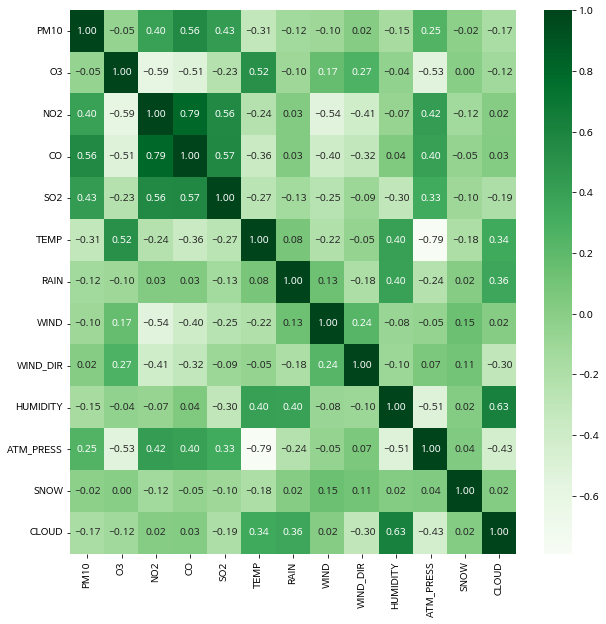

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr, annot = True, fmt = '.2f', cmap = 'Greens', ax = ax)
plt.show()

#### 탐색적 분석 진행 결과 PM10(미세먼지 농도)는 CO, SO2, NO 순으로 양의 상관관계가 있으며, TEMP (온도)와는 음의 상관관계가 있음을 알 수 있었다.

#### 회귀분석

In [ ]:
model_reg = smf.ols("PM10~ O3 +NO2 + CO+ SO2+TEMP+RAIN+WIND+WIND_DIR+HUMIDITY+ATM_PRESS+SNOW+CLOUD", data=df_raw)
model_result = model_reg.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     29.99
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           7.66e-47
Time:                        06:25:45   Log-Likelihood:                -1399.5
No. Observations:                 365   AIC:                             2825.
Df Residuals:                     352   BIC:                             2876.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    425.3786    161.638      2.632      0.0

###### p값이 0.05보다 작아 유의한 변수는 O3, NO2, CO, SO2, TEMP, RAIN, WIND, WIND_DIR, ATM_PRESS가 있다.
###### 해당 모델로는 설명변수와 PM10 농도 간의 관계를 50.6% 설명할 수 있다.

#### 다중공선성 확인: VIF가 모두 10 미만으로 다중공선성 처리는 따로 하지 않음

In [ ]:
df_const = sm.add_constant(df_raw).drop(['PM10','MeasDate'],axis =1)
# 데이터 테이블 생성 값 입력
df_vif = pd.DataFrame()
# 변수 명 입력
df_vif['variable'] = df_const.columns
# variance_inflation_factor 다중공선성 함수, exog: 설명변수 데이터 
df_vif['VIF'] = [variance_inflation_factor(df_const.values,i) for i in range(df_const.shape[1])]
df_vif.sort_values('VIF', inplace =True)
df_vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,variable,VIF
11,SNOW,1.112323
6,RAIN,1.347075
8,WIND_DIR,1.504281
7,WIND,1.941561
4,SO2,1.948889
12,CLOUD,2.086472
9,HUMIDITY,2.666056
1,O3,2.704740
3,CO,3.777651
5,TEMP,4.599573


#### 회귀계수 표준화를 통하여 변수 중요도 확인

In [ ]:
# 목표변수, 설명변수 데이터 지정
df_raw_x = df_raw.drop(['PM10','MeasDate'],axis=1,inplace=False)
df_raw_y = df_raw['PM10']
print(df_raw_x.head())
print('-'*80)
print(df_raw_y.head())

      O3    NO2   CO    SO2   TEMP  RAIN  WIND  WIND_DIR  HUMIDITY  ATM_PRESS  \
0  0.054  0.021  0.5  0.003  24.03   0.0  2.30       249      63.2      995.1   
1  0.053  0.020  0.5  0.003  24.29   0.0  2.26       265      63.2      998.6   
2  0.042  0.023  0.4  0.003  24.18   0.0  1.79       280      65.3      998.3   
3  0.034  0.026  0.4  0.003  25.35   0.0  2.04       263      58.6      996.6   
4  0.045  0.035  0.5  0.003  27.30   0.0  1.45       175      45.5      993.5   

   SNOW  CLOUD  
0   0.0   5.70  
1   0.0   3.83  
2   0.0   6.29  
3   0.0   2.54  
4   0.0   3.92  
--------------------------------------------------------------------------------
0    29.0
1    26.0
2    30.0
3    28.0
4    29.0
Name: PM10, dtype: float64


In [ ]:
# 설명변수 표준화
scaler = StandardScaler()
df_scale_x = scaler.fit_transform(df_raw_x)
df_scale_x = pd.DataFrame(df_scale_x, columns= df_raw_x.columns)
df_scale_x.head()

,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2.558984,-0.566824,-0.103008,-0.052053,1.035373,-0.337916,0.105769,0.561308,0.204900,-1.325967,-0.103499,0.216196
1,2.474806,-0.664322,-0.103008,-0.052053,1.061826,-0.337916,0.050401,0.787644,0.204900,-0.894922,-0.103499,-0.410992
2,1.548858,-0.371828,-0.812400,-0.052053,1.050634,-0.337916,-0.600182,0.999835,0.349878,-0.931868,-0.103499,0.414079
3,0.875442,-0.079334,-0.812400,-0.052053,1.169676,-0.337916,-0.254127,0.759352,-0.112673,-1.141233,-0.103499,-0.843651
4,1.801390,0.798148,-0.103008,-0.052053,1.368080,-0.337916,-1.070816,-0.485500,-1.017064,-1.523017,-0.103499,-0.380806


In [ ]:
# 데이터 결합(Series + DataFrame)
df_scale = pd.concat([df_raw_y,df_scale_x], axis=1)

df_scale.head()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,29.0,2.558984,-0.566824,-0.103008,-0.052053,1.035373,-0.337916,0.105769,0.561308,0.204900,-1.325967,-0.103499,0.216196
1,26.0,2.474806,-0.664322,-0.103008,-0.052053,1.061826,-0.337916,0.050401,0.787644,0.204900,-0.894922,-0.103499,-0.410992
2,30.0,1.548858,-0.371828,-0.812400,-0.052053,1.050634,-0.337916,-0.600182,0.999835,0.349878,-0.931868,-0.103499,0.414079
3,28.0,0.875442,-0.079334,-0.812400,-0.052053,1.169676,-0.337916,-0.254127,0.759352,-0.112673,-1.141233,-0.103499,-0.843651
4,29.0,1.801390,0.798148,-0.103008,-0.052053,1.368080,-0.337916,-1.070816,-0.485500,-1.017064,-1.523017,-0.103499,-0.380806


In [ ]:
#회귀분석: 표준화된 설명변수
model_reg_scale = smf.ols('PM10~ O3 +NO2 + CO+ SO2+TEMP+RAIN+WIND+WIND_DIR+HUMIDITY+ATM_PRESS+SNOW+CLOUD', data=df_scale)

model_result_scale = model_reg_scale.fit()
print(model_result_scale.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     25.17
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           1.60e-40
Time:                        06:25:45   Log-Likelihood:                -1409.8
No. Observations:                 364   AIC:                             2846.
Df Residuals:                     351   BIC:                             2896.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.5477      0.621     54.005      0.0

##### scaling 진행 후 SO2, RAIN, HUMIDITY, SNOW, CLOUD은 유의하지 않은 계수임을 알 수 있었음

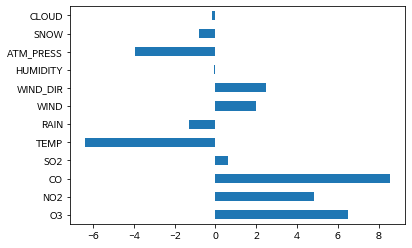

In [ ]:
#회귀계수 그래프
model_result_scale.params.drop('Intercept').plot.barh()
plt.show()

#### CO, NO2, O3, WIND_DIR, WIND (+) 관계 / TEMP, ATM_PRESS (-) 관계로 확인

#### Decision Tree를 통한 잠재적 영향인자 찾기

In [ ]:
# 목표변수, 설명변수 데이터 지정
df_raw_x = df_raw.drop(['PM10','MeasDate'],axis=1,inplace=False)
df_raw_y = df_raw['PM10']
print(df_raw_x.head())
print(df_raw_y.head())

      O3    NO2   CO    SO2   TEMP  RAIN  WIND  WIND_DIR  HUMIDITY  ATM_PRESS  \
0  0.054  0.021  0.5  0.003  24.03   0.0  2.30       249      63.2      995.1   
1  0.053  0.020  0.5  0.003  24.29   0.0  2.26       265      63.2      998.6   
2  0.042  0.023  0.4  0.003  24.18   0.0  1.79       280      65.3      998.3   
3  0.034  0.026  0.4  0.003  25.35   0.0  2.04       263      58.6      996.6   
4  0.045  0.035  0.5  0.003  27.30   0.0  1.45       175      45.5      993.5   

   SNOW  CLOUD  
0   0.0   5.70  
1   0.0   3.83  
2   0.0   6.29  
3   0.0   2.54  
4   0.0   3.92  
0    29.0
1    26.0
2    30.0
3    28.0
4    29.0
Name: PM10, dtype: float64


In [ ]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_raw_x, df_raw_y)

#모델 설명력
print("Score on train set: {:.3f}".format(tree_uncustomized.score(df_raw_x,df_raw_y)))

Score on train set: 1.000


In [ ]:
v_feature_names = df_raw_x.columns
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_names
df_importance['Importance'] = tree_uncustomized.feature_importances_
#df_feature_importance의 테이블을 중요도 기준으로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,CO,0.344
0,O3,0.164
4,TEMP,0.130
11,CLOUD,0.089
8,HUMIDITY,0.078
6,WIND,0.073
9,ATM_PRESS,0.035
1,NO2,0.033
5,RAIN,0.027
7,WIND_DIR,0.017


Text(0, 0.5, '변수')

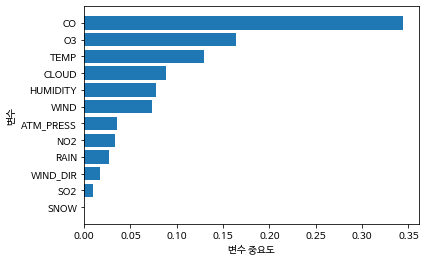

In [ ]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

##### DT를 통한 영향인자 분석 결과: CO > O3 > TEMP > CLOUD 로 확인됨

#### RandomForest를 통한 영향인자 분석

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_raw_x, df_raw_y)

#모델 설명력
print("Score on train set: {:.3f}".format(rf_uncustomized.score(df_raw_x,df_raw_y)))

Score on train set: 0.930


In [ ]:
v_feature_names = df_raw_x.columns
df_importance = pd.DataFrame()# rf_uncustomized.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_names
df_importance['Importance'] = rf_uncustomized.feature_importances_
#rf_uncustomized.feature_importances_의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,CO,0.355
0,O3,0.126
4,TEMP,0.096
11,CLOUD,0.081
7,WIND_DIR,0.064
6,WIND,0.063
1,NO2,0.062
8,HUMIDITY,0.057
9,ATM_PRESS,0.048
5,RAIN,0.031


Text(0, 0.5, '변수')

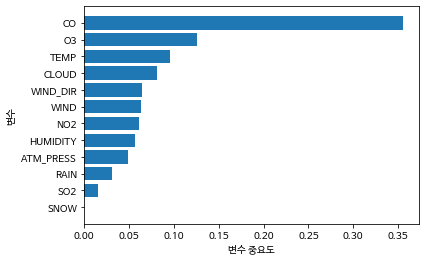

In [ ]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

##### RF를 통한 영향인자 분석 결과: CO > O3 > TEMP > CLOUD 로 확인됨

#### Gradient Boosting을 통한 영향인자 분석

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_raw_x, df_raw_y)

#모델 설명력
print("Score on train set: {:.3f}".format(gb_uncustomized.score(df_raw_x,df_raw_y)))

Score on train set: 0.889


In [ ]:
v_feature_names = df_raw_x.columns
df_importance = pd.DataFrame()# gb_uncustomized.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_names
df_importance['Importance'] = gb_uncustomized.feature_importances_
#gb_uncustomized.feature_importances_의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,CO,0.379
0,O3,0.157
4,TEMP,0.106
7,WIND_DIR,0.072
11,CLOUD,0.067
1,NO2,0.055
6,WIND,0.053
8,HUMIDITY,0.040
9,ATM_PRESS,0.032
5,RAIN,0.029


Text(0, 0.5, '변수')

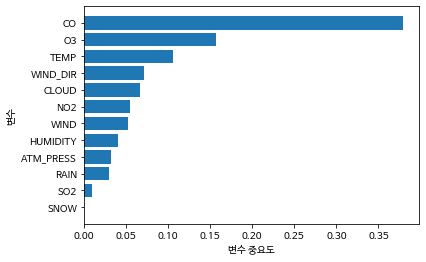

In [ ]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

##### GB를 통한 영향인자 분석 결과: CO > O3 > TEMP > WIND_DIR 로 확인됨

#### 예측 모델링

In [ ]:
# 목표 변수, 설명변수 데이터 재지정
df_new_x = df_raw[["CO", "O3", "NO2", "TEMP", "ATM_PRESS", 'WIND', "WIND_DIR"]]
df_new_y = df_raw["PM10"]

df_new_x.head()

,CO,O3,NO2,TEMP,ATM_PRESS,WIND,WIND_DIR
0,0.5,0.054,0.021,24.03,995.1,2.30,249
1,0.5,0.053,0.020,24.29,998.6,2.26,265
2,0.4,0.042,0.023,24.18,998.3,1.79,280
3,0.4,0.034,0.026,25.35,996.6,2.04,263
4,0.5,0.045,0.035,27.30,993.5,1.45,175


In [ ]:
df_train, df_test = train_test_split(df_raw, test_size =0.3)
print('train data size: {}'.format(df_train.shape))
print('train data size: {}'.format(df_test.shape))
#회귀모델 생성

train data size: (255, 14)
train data size: (110, 14)


In [ ]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_new_x, df_new_y, test_size = 0.3)
print('분할 전 설명변수 데이터:', df_new_x.shape)
print('분할 후 설명변수 데이터:Train', df_train_x.shape, " Test",df_test_x.shape)

분할 전 설명변수 데이터: (365, 7)
분할 후 설명변수 데이터:Train (255, 7)  Test (110, 7)


#### 예측 회귀모델

In [ ]:
model_reg = smf.ols("PM10~ O3 + CO+ NO2+ TEMP+WIND_DIR+ATM_PRESS+CLOUD", data=df_raw)
model_result = model_reg.fit()
print(model_result.summary()) 
#모델의 설명력은 48.4%이다.

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     48.68
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           2.48e-48
Time:                        06:25:48   Log-Likelihood:                -1405.7
No. Observations:                 365   AIC:                             2827.
Df Residuals:                     357   BIC:                             2859.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    360.0333    148.837      2.419      0.0

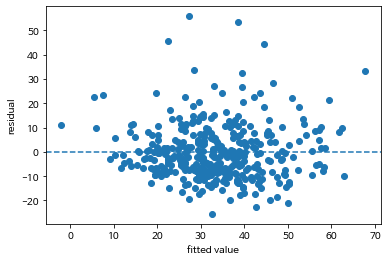

In [ ]:
plt.scatter(model_result.fittedvalues, model_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y=0, linestyle ='--')

In [ ]:
from statsmodels.api import qqplot, add_constant

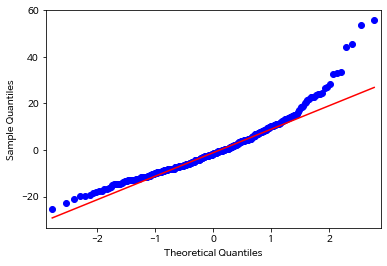

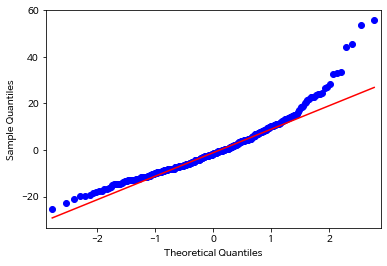

In [ ]:
qqplot(model_result.resid, line ='q')

In [ ]:
# plt.scatter(df_train.index, model_result.resid)
# plt.xlabel('Data') ; plt.ylabel('Residual')
# plt.axhline(y=0, linestyle = '-', label ='CL')
# plt.axhline(y=3 *np.std(model_result.resid), linestyle = '--', color = 'red', label = 'UCL')
# plt.axhline(y=-3 *np.std(model_result.resid), linestyle = 'dashed', color = 'red', label = 'LCL')
# plt.legend()

In [ ]:
train_pred = model_result.predict(df_train)
test_pred = model_result.predict(df_test)

print('train 데이터의 결정계수:', r2_score(df_train['PM10'],train_pred))
print('test 데이터의 결정계수:', r2_score(df_test['PM10'],test_pred))

train 데이터의 결정계수: 0.49654192590544877
test 데이터의 결정계수: 0.4634678952831571


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

#### 후진제거법을 이용한 변수선택 -> 오히려 결과가 안좋았음

In [ ]:
df_train_y = df_train ['PM10']
df_train_x = df_train.drop(['PM10','MeasDate'],axis=1,inplace=False)

model = LinearRegression()
rfe = RFE (estimator = model, n_features_to_select = 6).fit(df_train_x, df_train_y)
#RFE 함수: 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거 (전체 변수 중 5개 변수가 남을때까지 삭제)
selected_cols = df_train_x.columns[rfe.support_]
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables: {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))

Selected Variables: Index(['O3', 'NO2', 'CO', 'SO2', 'WIND', 'SNOW'], dtype='object')
Removed Variables: Index(['TEMP', 'RAIN', 'WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'CLOUD'], dtype='object')


In [ ]:
model_reg = smf.ols("PM10~ O3 + CO+ NO2+ SO2+WIND+RAIN", data=df_raw)
model_result = model_reg.fit()
print(model_result.summary()) 
#모델의 설명력은 43.7%이다.

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     48.06
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           3.86e-43
Time:                        06:25:49   Log-Likelihood:                -1420.2
No. Observations:                 365   AIC:                             2854.
Df Residuals:                     358   BIC:                             2882.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.1944      5.642     -7.125      0.0

In [ ]:
train_pred = model_result.predict(df_train)
test_pred = model_result.predict(df_test)

print('train 데이터의 결정계수:', r2_score(df_train['PM10'],train_pred))
print('test 데이터의 결정계수:', r2_score(df_test['PM10'],test_pred))

train 데이터의 결정계수: 0.4491110625580569
test 데이터의 결정계수: 0.43583245377432744


#### 규제화 모델 적용 -> 기존 대비 정확도 감소

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet #Ridge, Lasso, ElasticNet 불러오기

In [ ]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["PM10"]
df_raw_x = df_raw.drop(['PM10','MeasDate'],axis=1,inplace=False)

# train/test data 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (255, 12)
train data Y size : (255,)
test data X size : (110, 12)
test data Y size : (110,)


In [ ]:
elastic = ElasticNet(alpha =1, l1_ratio =0.5)
elastic.fit(df_train_x, df_train_y)
print(elastic.intercept_)

286.89729860558145


In [ ]:
df_elastic_coef = pd.DataFrame({'Coef': elastic.coef_}, index = df_train_x.columns)
df_elastic_coef

,Coef
O3,0.000000
NO2,0.000000
CO,0.975639
SO2,0.000000
TEMP,-0.557242
RAIN,-0.625324
WIND,-1.316207
WIND_DIR,0.000219
HUMIDITY,-0.017214
ATM_PRESS,-0.238932


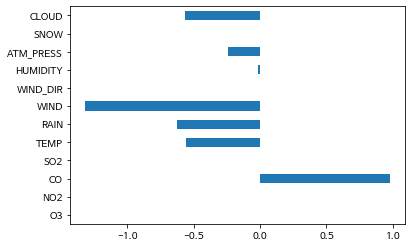

In [ ]:
df_elastic_coef.plot.barh(y = 'Coef', legend = False) #없어지는 것이 있고, 유지되는 것이 있음 (Ridge+Lasso 이기 때문)

In [ ]:
train_pred = elastic.predict (df_train_x)
test_pred = elastic.predict (df_test_x)

print('train data의 결정계수:', r2_score(df_train_y, train_pred))
print('test data의 결정계수:', r2_score(df_test_y, test_pred))

train data의 결정계수: 0.14119335165519786
test data의 결정계수: 0.05608207544133659


In [ ]:
ridge = Ridge( alpha =1) #모델생성
ridge.fit(df_train_x, df_train_y)
print(ridge.intercept_) #절편값 확인 

743.8933624597789


In [ ]:
df_ridge_coef = pd.DataFrame({'Coef': ridge.coef_}, index = df_train_x.columns) #회귀계수 확인
df_ridge_coef

,Coef
O3,6.003215
NO2,3.850671
CO,60.216985
SO2,0.303989
TEMP,-0.448084
RAIN,-1.472088
WIND,0.206829
WIND_DIR,0.035566
HUMIDITY,-0.162659
ATM_PRESS,-0.726818


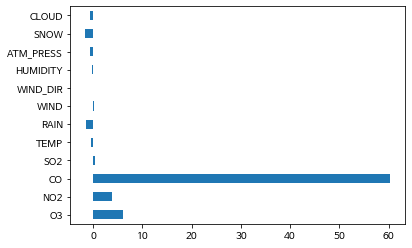

In [ ]:
df_ridge_coef.plot.barh(y = 'Coef', legend = False) #회귀계수 그래프 

In [ ]:
train_pred = ridge.predict (df_train_x) #모델의 성능
test_pred = ridge.predict (df_test_x)

print('train data의 결정계수:', r2_score(df_train_y, train_pred))
print('test data의 결정계수:', r2_score(df_test_y, test_pred))

train data의 결정계수: 0.4307923062907446
test data의 결정계수: 0.317096921767139


#### DT를 통한 예측 모델

In [ ]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["PM10"]
df_raw_x = df_raw.drop(['PM10','MeasDate'],axis=1,inplace=False)

# train/test data 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (255, 12)
train data Y size : (255,)
test data X size : (110, 12)
test data Y size : (110,)


In [ ]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print('Score on training set: {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y))) #train data 설명력
print('Score on test set: {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y))) #test data 설명력 
#train 100%, test 13.3% > 과대적합 

Score on training set: 1.000
Score on test set: -0.014


In [ ]:
tree_uncustomized

DecisionTreeRegressor(random_state=1234)

In [ ]:
train_score = []; test_score = [] 
#train 및 test 설명력 결과 저장 
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = v_min_samples_leaf)
#min_samples_leaf:잎사귀 최소 자료 수 변경에 따른 모델 성능 
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
#결과저장 

In [ ]:
df_score_leaf.round(3) #모델 설명력 확인 ,10일때가 제일 train과 test가 차이가 없다.

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,-0.014
1,2,0.958,0.003
2,3,0.858,0.070
3,4,0.806,0.111
4,5,0.766,0.133
5,6,0.713,0.164
6,7,0.701,0.181
7,8,0.667,0.171
8,9,0.623,0.353
9,10,0.588,0.285


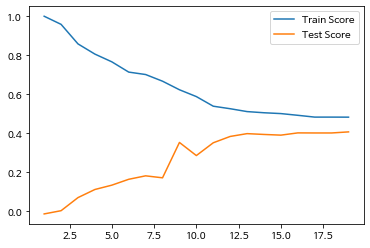

In [ ]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score') #모델 설명력 그래프 확인 
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.legend()

In [ ]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2,20)]
for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 10,min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
#min_samples_split:분리 노드의 최소 자료 수 변경에 따른 모델 성능     
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.588,0.285
1,6,0.588,0.285
2,8,0.588,0.285
3,10,0.588,0.285
4,12,0.588,0.285
5,14,0.588,0.285
6,16,0.588,0.285
7,18,0.588,0.285
8,20,0.588,0.285
9,22,0.550,0.318


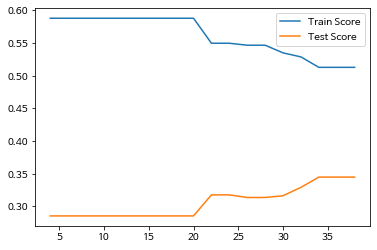

In [ ]:
df_score_split.round(3)
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '-', label = 'Test Score')
plt.legend()
#4부터 20까지 차이가 없는걸로 보아서 제일 과적합이 덜되는 min_split 22이지만
#일반화를 생각해서 20로 하겠다

In [ ]:
v_feature_name = df_train_x.columns
#변수명 저장 

In [ ]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 10,min_samples_split = 20, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
#max_depth:최대 깊이 변경에 따른 모델 성능 
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.208,0.372
1,2,0.304,0.390
2,3,0.412,0.444
3,4,0.495,0.424
4,5,0.552,0.375
5,6,0.576,0.305
6,7,0.588,0.285
7,8,0.588,0.285
8,9,0.588,0.285
9,10,0.588,0.285


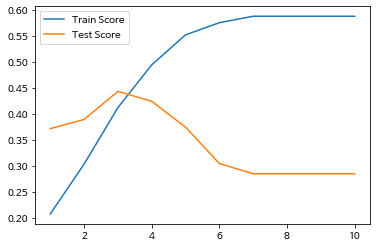

In [ ]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '-', label = 'Test Score')
plt.legend()
# depth가 69 이상일때는 차이가 없다.
# 3일때가 과소 적합의 위험이 있지만 train과 test 의 차이가 작기때문에 3으로 선정함

In [ ]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 10, min_samples_split =20, max_depth = 3,random_state=1234)  
tree_final.fit(df_train_x, df_train_y)

print("Score on training set %.3f"%tree_final.score(df_train_x,df_train_y))
print("Score on test set %.3f"%tree_final.score(df_test_x,df_test_y)) 

#-----기존-------------
#Score on training set: 1.000
#Score on test set: -0.445
#기존 대비 test data 정확도는 향상되었음

Score on training set 0.412
Score on test set 0.444


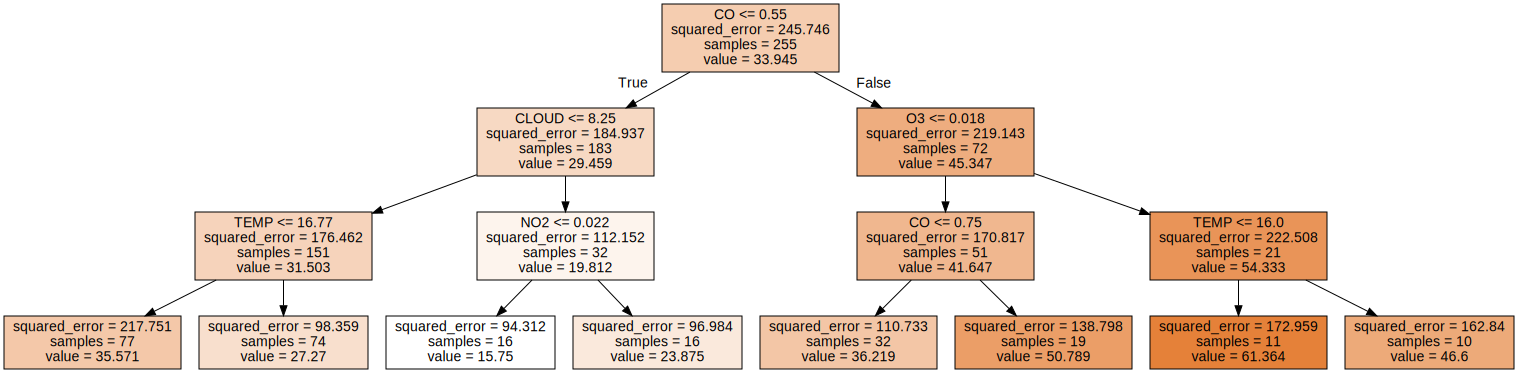

In [ ]:
export_graphviz(tree_final, out_file = 'tree_final.dot', 
                feature_names = v_feature_name, 
                impurity = True, filled = True)

with open ('tree_final.dot') as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [ ]:
df_importance = pd.DataFrame()# tree.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_
#tree_final.feature_importances_의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,CO,0.603
4,TEMP,0.145
11,CLOUD,0.140
0,O3,0.093
1,NO2,0.020
3,SO2,0.000
5,RAIN,0.000
6,WIND,0.000
7,WIND_DIR,0.000
8,HUMIDITY,0.000


Text(0, 0.5, '변수')

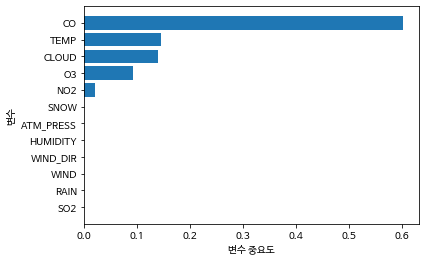

In [ ]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

#### 미세먼지에 영향을 주는 데이터는 CO, O3, TEMP 순인 것으로 나타났다.

#### RF를 통한 예측 모델

In [ ]:
rf_tree_uncustomized = RandomForestRegressor(random_state=1234)
rf_tree_uncustomized.fit(df_train_x, df_train_y)

RandomForestRegressor(random_state=1234)

In [ ]:
print('Score on training set: {:.3f}'.format(rf_tree_uncustomized.score(df_train_x, df_train_y))) #train data 설명력
print('Score on test set: {:.3f}'.format(rf_tree_uncustomized.score(df_test_x, df_test_y))) #test data 설명력 
#train 91.8%, test 50.0% 과대적합 상황

Score on training set: 0.913
Score on test set: 0.502


In [ ]:
# 모델 parameter 조정
train_score = []; test_score = [] 
#train 및 test 설명력 결과 저장 
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]
for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state=1234, n_estimators=v_n_estimators)
#min_samples_leaf:잎사귀 최소 자료 수 변경에 따른 모델 성능 
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
#결과저장 

# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.883,0.470
1,20,0.897,0.502
2,30,0.901,0.509
3,40,0.895,0.501
4,50,0.899,0.503
5,60,0.905,0.491
6,70,0.907,0.484
7,80,0.909,0.492
8,90,0.910,0.501
9,100,0.913,0.502


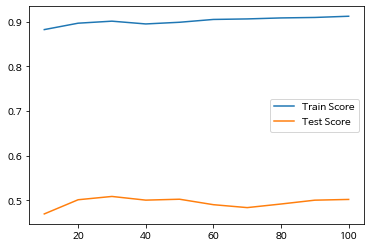

In [ ]:
#모델 설명력 그래프 확인 
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '-', label = 'Test Score')
plt.legend()
# 트리 수 증가함에 따라 train 모델의 설명력 감소
# 과적합 방지를 위해 60 선정

In [ ]:
train_score = []; test_score = [] 
#train 및 test 설명력 결과 저장 
para_leaf = [n_leaf *1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators=60,min_samples_leaf=v_min_samples_leaf)
#min_samples_leaf:잎사귀 최소 자료 수 변경에 따른 모델 성능 
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['MinsamplesLeaf'] = para_leaf
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
#결과저장 

# 모델 설명력 확인
df_score_n.round(3)

,MinsamplesLeaf,TrainScore,TestScore
0,1,0.905,0.491
1,2,0.862,0.509
2,3,0.814,0.521
3,4,0.769,0.524
4,5,0.737,0.523
5,6,0.698,0.516
6,7,0.666,0.510
7,8,0.638,0.512
8,9,0.611,0.497
9,10,0.595,0.493


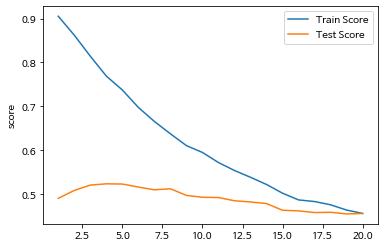

In [ ]:
#모델 설명력 그래프 확인 
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score');plt.legend()
#잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소
# test 데이터의 정확도 변화를 고려하여 6일때가 최대이므로 6로 선정함

In [ ]:
# min_sample_split 분리 노드의 최소 자료 수 변경에 따른 모델 성능
train_score = []; test_score = [] 
#train 및 test 설명력 결과 저장 
para_split = [n_split *2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators=60,min_samples_leaf=6,min_samples_split=v_min_samples_split)
#min_samples_leaf:잎사귀 최소 자료 수 변경에 따른 모델 성능 
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
# 데이터 테이블로 저장    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
#결과저장 

# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.698,0.516
1,6,0.698,0.516
2,8,0.698,0.516
3,10,0.698,0.516
4,12,0.698,0.516
5,14,0.683,0.512
6,16,0.669,0.514
7,18,0.653,0.511
8,20,0.636,0.508
9,22,0.626,0.510


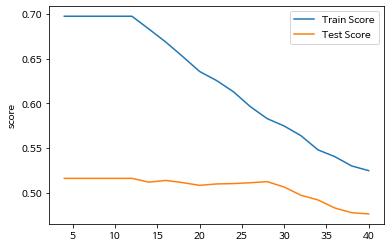

In [ ]:
#모델 설명력 그래프 확인 
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score');plt.legend()
#분리 노드 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소 
#12로 선정

In [ ]:
# max_depth: 최대 깊이 변경에 따른 모델 성능
# min_sample_split 분리 노드의 최소 자료 수 변경에 따른 모델 성능
train_score = []; test_score = [] 
#train 및 test 설명력 결과 저장 
para_depth = [depth for depth in range(1,15)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators=60,min_samples_leaf=6, min_samples_split=12, max_depth=v_max_depth) 
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
# 데이터 테이블로 저장    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
#결과저장 

# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.242,0.372
1,2,0.384,0.427
2,3,0.492,0.479
3,4,0.583,0.499
4,5,0.640,0.514
5,6,0.671,0.517
6,7,0.687,0.517
7,8,0.694,0.518
8,9,0.697,0.517
9,10,0.697,0.517


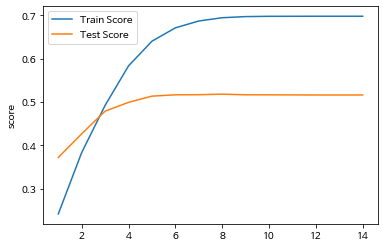

In [ ]:
#모델 설명력 그래프 확인 
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score');plt.legend()
#최대 깊이 증가에 따라 모델 설명력 증가
#모델간 차이가 작은 9로 잡아 하겠음

In [ ]:
# 결론도출
# 최종모델 생성
rf_final = RandomForestRegressor(random_state=1234, n_estimators=60,
                                 min_samples_leaf = 6,
                                 min_samples_split =12, 
                                 max_depth = 9)
rf_final.fit(df_train_x, df_train_y)
print("Score on training set %.3f"%rf_final.score(df_train_x,df_train_y))
print("Score on test set %.3f"%rf_final.score(df_test_x,df_test_y)) 

#-----기존-------------
#Score on training set: 0.918
#Score on test set: 0.500

#기존 대비 test data 정확도는 향상되었음

Score on training set 0.697
Score on test set 0.517


In [ ]:
# estimator = RandomForestRegressor(random_state=1234)

# param_grid = {'max_depth':para_depth,
#               'min_samples_split': para_split, 'min_samples_leaf': para_leaf}

# grid_rf = GridSearchCV(estimator, param_grid, scoring = 'r2', n_jobs = -1)
# grid_rf.fit(df_train_x, df_train_y)

# print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
# print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
# print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

Text(0, 0.5, '변수')

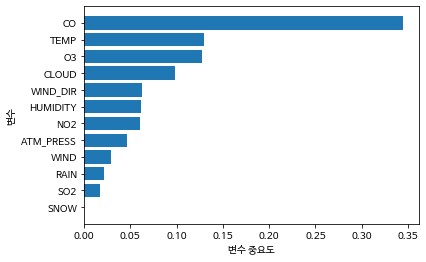

In [ ]:
df_importance = pd.DataFrame()# rf_final.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

#### 미세먼지에 영향을 주는 데이터는 CO, O3, TEMP 순인 것으로 나타났다.

#### GB를 통한 예측모델

In [ ]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set: {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y))) #train data 설명력
print('Score on test set: {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y))) #test data 설명력 
#train 92.9%, test 61.0% 과대적합임을 알 수 있음

Score on training set: 0.915
Score on test set: 0.498


In [ ]:
# 모델 parameter 조정
train_score = []; test_score = [] 
#train 및 test 설명력 결과 저장 
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]
for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=v_n_estimators) 
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['Estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
#결과저장 

# 모델 설명력 확인
df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.432,0.375
1,20,0.618,0.484
2,30,0.707,0.512
3,40,0.762,0.536
4,50,0.805,0.533
5,60,0.842,0.519
6,70,0.864,0.512
7,80,0.883,0.505
8,90,0.903,0.502
9,100,0.915,0.498


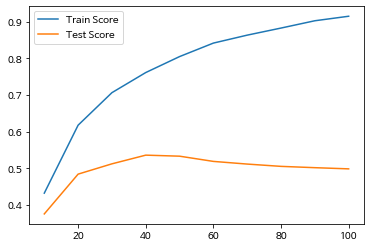

In [ ]:
#모델 설명력 그래프 확인 
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '-', label = 'Test Score')
plt.legend()
#트리 수 증가함에 따라 모델의 과적합이 일어난다 
#60으로 선정

In [ ]:
train_score = []; test_score = [] 
#train 및 test 설명력 결과 저장 
para_leaf = [n_leaf *1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=60, min_samples_leaf=v_min_samples_leaf)
#min_samples_leaf:잎사귀 최소 자료 수 변경에 따른 모델 성능 
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinsamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
#결과저장 
# 모델 설명력 확인
df_score_leaf.round(3)

,MinsamplesLeaf,TrainScore,TestScore
0,1,0.842,0.519
1,2,0.822,0.532
2,3,0.829,0.537
3,4,0.827,0.529
4,5,0.827,0.555
5,6,0.812,0.531
6,7,0.800,0.554
7,8,0.808,0.557
8,9,0.799,0.564
9,10,0.803,0.551


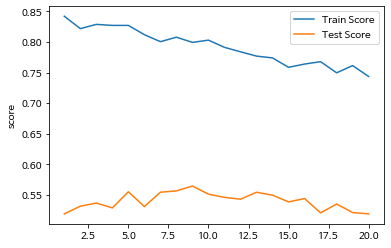

In [ ]:
#모델 설명력 그래프 확인 
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score');plt.legend()
#잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소
# test 데이터의 정확도 변화를 고려하여 11으로 선정

In [ ]:
# min_sample_split 분리 노드의 최소 자료 수 변경에 따른 모델 성능
train_score = []; test_score = [] 
#train 및 test 설명력 결과 저장 
para_split = [n_split *2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=60,min_samples_leaf=11,min_samples_split=v_min_samples_split)
#min_samples_leaf:잎사귀 최소 자료 수 변경에 따른 모델 성능 
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
#결과저장 

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.791,0.546
1,6,0.791,0.546
2,8,0.791,0.546
3,10,0.791,0.546
4,12,0.791,0.546
5,14,0.791,0.546
6,16,0.791,0.546
7,18,0.791,0.546
8,20,0.791,0.546
9,22,0.791,0.546


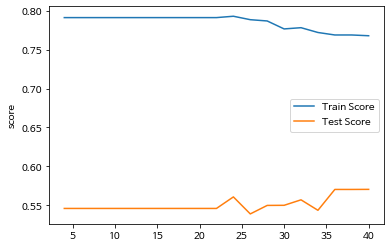

In [ ]:
#모델 설명력 그래프 확인 
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score');plt.legend()
#분리 노드 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소
#마찬가지로 min_sample_split이 커질수록 같은 비율로 설명력이 줄어든다. 
#일반화를 생각하면 min_sample_split가 클 수록 일반화가 잘 되니 24으로 선정


In [ ]:
# max_depth: 최대 깊이 변경에 따른 모델 성능
# min_sample_split 분리 노드의 최소 자료 수 변경에 따른 모델 성능
train_score = []; test_score = [] 
#train 및 test 설명력 결과 저장 
para_depth = [depth for depth in range(1,15)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=60,min_samples_leaf=11, min_samples_split=24,max_depth=v_max_depth) 
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
#결과저장 

# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.426,0.456
1,2,0.648,0.531
2,3,0.793,0.561
3,4,0.861,0.552
4,5,0.896,0.539
5,6,0.919,0.537
6,7,0.933,0.534
7,8,0.940,0.499
8,9,0.944,0.526
9,10,0.944,0.503


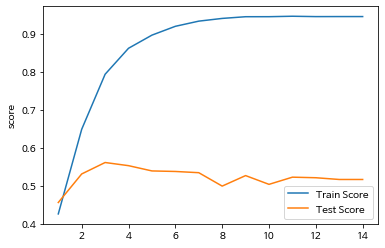

In [ ]:
#모델 설명력 그래프 확인 
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score');plt.legend()
# Max_depth가 작을 수록 일반화가 좋으므로 3으로 진행

In [ ]:
### Learning_rate 학습률 변경에 따른 모델 성능

# max_depth: 최대 깊이 변경에 따른 모델 성능
# min_sample_split 분리 노드의 최소 자료 수 변경에 따른 모델 성능
train_score = []; test_score = [] 
#train 및 test 설명력 결과 저장 
para_lr = [lr*0.1 for lr in range(1,10)]

for v_learning_late in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=60,min_samples_leaf=11, min_samples_split=24,max_depth=3,learning_rate=v_learning_late) 
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장    
df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score
#결과저장 

# 모델 설명력 확인
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.793,0.561
1,0.2,0.874,0.563
2,0.3,0.930,0.521
3,0.4,0.946,0.474
4,0.5,0.973,0.420
5,0.6,0.981,0.482
6,0.7,0.985,0.395
7,0.8,0.992,0.342
8,0.9,0.992,0.400


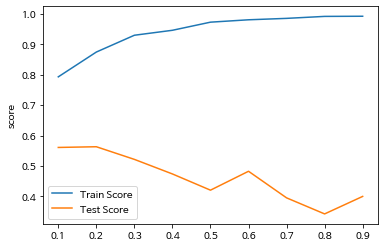

In [ ]:
#모델 설명력 그래프 확인 
plt.plot(para_lr, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_lr, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score');plt.legend()
# learning rate 학습률 증가에 따라 모델의 설명력은 높아지지만 테스트 데이터의 성능은 저하됨
# lr 이 작을 수록 시간은 오래걸리긴 하지만 가장 성능차이가 없는 0.1로 진행

In [ ]:
# 결론도출
# 최종모델 생성
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=60,min_samples_leaf=11, min_samples_split=24,max_depth=3,learning_rate=0.1)
gb_final.fit(df_train_x, df_train_y)
print("Score on training set %.3f"%gb_final.score(df_train_x,df_train_y))
print("Score on test set %.3f"%gb_final.score(df_test_x,df_test_y))

#-------기존-----------
#Score on training set: 0.929
#Score on test set: 0.610

#test 모델 기준 기존 대비 성능이 향상된 것을 볼 수 있음

Score on training set 0.793
Score on test set 0.561


In [ ]:
# 결론도출
v_feature_name = df_train_x.columns # 변수명 저장

In [ ]:
# 결론 도출
# feature_importances_: 설명변수의 중요도
df_importance = pd.DataFrame()# gb_final.feature_importances_로 설명 변수 중요도 확인 테이블로 저장
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_
#df_feature_importance의 테이블을 중요도 별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,CO,0.344
0,O3,0.149
4,TEMP,0.136
11,CLOUD,0.081
7,WIND_DIR,0.073
8,HUMIDITY,0.053
1,NO2,0.052
9,ATM_PRESS,0.043
6,WIND,0.039
5,RAIN,0.029


Text(0, 0.5, '변수')

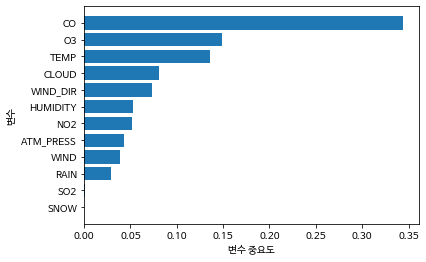

In [ ]:

df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')
# Decision Tree, Randomforest와 변수 중요도 차이는 거의 없음을 알 수있다.

#### 모델평가 진행

In [ ]:
# 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
 
# 회귀분석
#회귀모델
import statsmodels.formula.api as smf
import statsmodels.api as sm
#선형회귀 모델
from sklearn.linear_model import LinearRegression

In [ ]:
# RMSE:root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
 
# MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size =0.3) #데이터7:3분할
print('train data size: {}'.format(df_train_x.shape))
print('train data size: {}'.format(df_train_y.shape))
print('test data size: {}'.format(df_test_x.shape))
print('test data size: {}'.format(df_test_y.shape))

train data size: (255, 12)
train data size: (255,)
test data size: (110, 12)
test data size: (110,)


In [ ]:
# 회귀 모델
lr_model = smf.ols(formula = "PM10~ O3 + CO+ NO2+ TEMP+WIND_DIR+ATM_PRESS+CLOUD+WIND", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())
 
# Decision Tree
dt_model = DecisionTreeRegressor(min_samples_leaf = 10, min_samples_split =20, max_depth = 3,random_state=1234)
dt_model.fit(df_train_x, df_train_y)
 
# Random Forest
rf_model = RandomForestRegressor(random_state=1234, n_estimators=60,
                                 min_samples_leaf = 6,
                                 min_samples_split =12, 
                                 max_depth = 9)
rf_model.fit(df_train_x, df_train_y)
 
# Gradient Boosting
gb_model =GradientBoostingRegressor(random_state=1234, n_estimators=60,min_samples_leaf=11, min_samples_split=24,max_depth=3,learning_rate=0.1)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     43.60
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           1.92e-48
Time:                        06:26:07   Log-Likelihood:                -1403.3
No. Observations:                 365   AIC:                             2825.
Df Residuals:                     356   BIC:                             2860.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    307.2840    150.132      2.047      0.0

GradientBoostingRegressor(min_samples_leaf=11, min_samples_split=24,
                          n_estimators=60, random_state=1234)

In [ ]:
train_pred = lr_result.predict(df_train)
test_pred = lr_result.predict(df_test)

print('train 데이터의 결정계수:', r2_score(df_train['PM10'],train_pred))
print('test 데이터의 결정계수:', r2_score(df_test['PM10'],test_pred))

train 데이터의 결정계수: 0.501996007568595
test 데이터의 결정계수: 0.4729711984114887


In [ ]:
models = ['회귀분석','의사결정나무','랜덤 포레스트','그래디언트 부스팅']# 모델 리스트, 그래프를 그리기 생성목적
mse, rmse, mae, mape = [],[],[],[]

In [ ]:
# 회귀분석
lr_y_pred = lr_result.predict(df_test)
#평가
mse.append(mean_squared_error(df_test['PM10'],lr_y_pred))
rmse.append(root_mean_squared_error(df_test['PM10'],lr_y_pred))
mae.append(mean_absolute_error(df_test['PM10'],lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['PM10'],lr_y_pred))

In [ ]:
dt_y_pred = dt_model.predict(df_test_x)  # 의사결정나무

#평가
mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

In [ ]:
# 랜덤포레스트
rf_y_pred = rf_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

In [ ]:
# 그래디언트 부스팅
gb_y_pred = gb_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

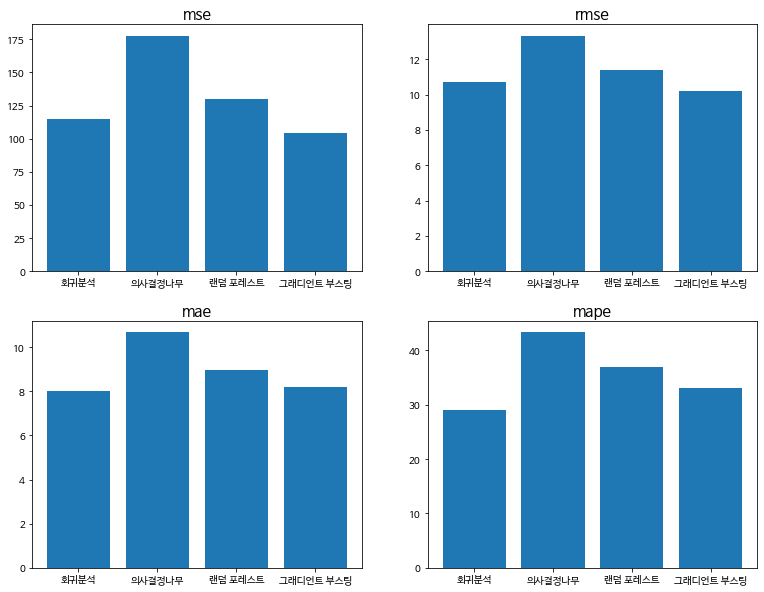

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title('mse').set_fontsize(15)
 
ax[0, 1].bar(models, rmse)
ax[0, 1].set_title('rmse').set_fontsize(15)
 
ax[1, 0].bar(models, mae)
ax[1, 0].set_title('mae').set_fontsize(15)
 
ax[1, 1].bar(models, mape)
ax[1, 1].set_title('mape').set_fontsize(15)

#### 회귀분석이 오차가 적어 성능이 가장 좋은 것을 알 수 있다. 또한, R²값이 0.478로 해당 분석 값은 유의미하다고 볼 수 있다.

# **Vital Few와 PM10 간의 관계 그래프 분석**

#### Vital Few: CO, O3, TEMP, WIND_DIR, WIND, CLOUD

In [ ]:
df_raw_b = df_raw[df_raw['PM10']>=51] 
#WHO 기준 PM10 수치 51이상부터 '나쁨'으로 분류
df_raw_b.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
16,2019-07-17,66.0,0.035,0.029,0.6,0.003,25.54,0.70,1.18,189,74.5,1001.3,0.0,8.75
17,2019-07-18,70.0,0.056,0.035,0.7,0.004,27.04,0.00,1.12,192,64.9,998.9,0.0,6.79
120,2019-10-29,83.0,0.021,0.023,0.4,0.003,13.05,0.25,2.40,286,62.1,1004.9,0.0,2.21
122,2019-10-31,72.0,0.022,0.041,0.6,0.004,14.23,0.00,2.21,138,72.8,1010.3,0.0,4.38
123,2019-11-01,89.0,0.027,0.037,0.6,0.003,15.30,0.00,1.80,256,60.0,1011.1,0.0,2.42


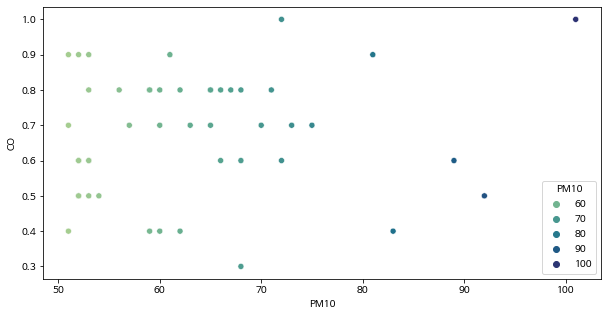

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='PM10',y='CO',hue='PM10',data=df_raw_b, palette="crest")
#CO가 0.4이상일 경우 PM10 농도가 높은 경향성이 확인된다.

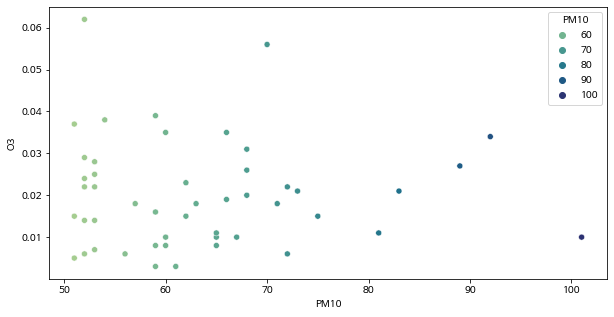

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='PM10',y='O3',hue='PM10',data=df_raw_b, palette="crest")
#O3가 0.04 이하일 경우 PM10 농도가 높은 경향성이 확인된다.

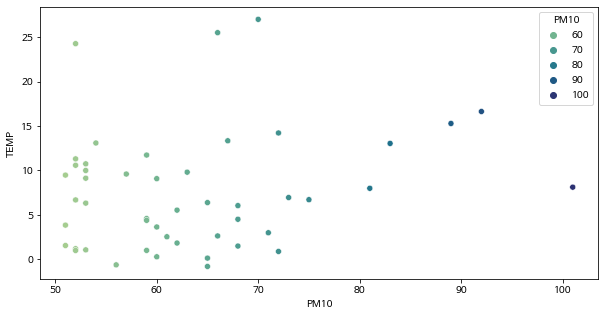

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='PM10',y='TEMP',hue='PM10',data=df_raw_b, palette="crest")
#TEMP가 15도 이하일 경우 PM10 농도가 높은 경향성이 확인된다.

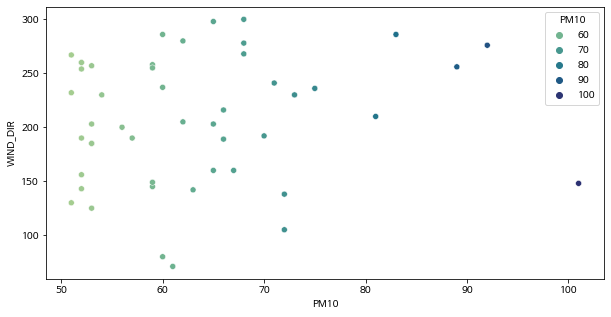

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='PM10',y='WIND_DIR',hue='PM10',data=df_raw_b, palette="crest") 
#WIND_DIR(풍향) 100 이상일때 PM10 농도가 높은 경향성이 확인된다.

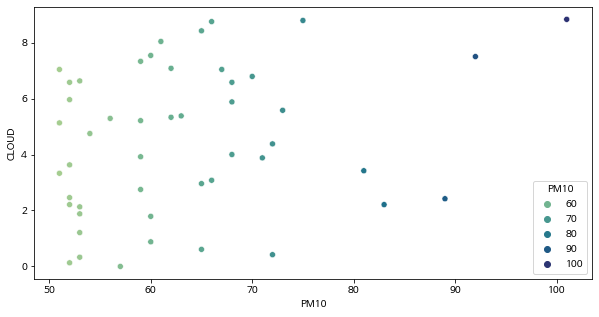

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='PM10',y='CLOUD',hue='PM10',data=df_raw_b, palette="crest") 
#CLOUD(전운량) 8 이하일때 PM10 농도가 높은 경향성이 확인된다.

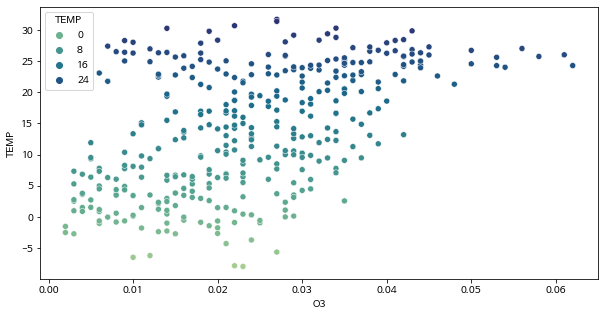

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='O3',y='TEMP',hue='TEMP',data=df_raw, palette="crest") 
#온도가 높을 때 오존의 농도도 높다.